In [1]:

# 1. IMPORT LIBRARIES
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import os, gzip, struct, pandas as pd

# Make output a bit nicer
plt.rcParams["figure.figsize"] = (10, 7)
sns.set(style="whitegrid")

# 2. LOAD THE DATA

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

# 3. PRE-PROCESSING

# Scale pixels to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Add a channel dimension so images are (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,  -1)

# Class names for plots
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [4]:

# 4. BUILD THE MODEL  (simple CNN)

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

# 5. TRAIN THE MODEL

EPOCHS = 10
history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)



Epoch 1/10
844/844 - 43s - 51ms/step - accuracy: 0.5986 - loss: 1.0904 - val_accuracy: 0.6995 - val_loss: 0.7432
Epoch 2/10
844/844 - 80s - 95ms/step - accuracy: 0.7312 - loss: 0.7125 - val_accuracy: 0.7477 - val_loss: 0.6730
Epoch 3/10
844/844 - 40s - 47ms/step - accuracy: 0.7570 - loss: 0.6431 - val_accuracy: 0.7738 - val_loss: 0.5970
Epoch 4/10
844/844 - 41s - 48ms/step - accuracy: 0.7775 - loss: 0.5917 - val_accuracy: 0.7897 - val_loss: 0.5607
Epoch 5/10
844/844 - 41s - 48ms/step - accuracy: 0.7913 - loss: 0.5532 - val_accuracy: 0.8032 - val_loss: 0.5341
Epoch 6/10
844/844 - 41s - 48ms/step - accuracy: 0.8048 - loss: 0.5219 - val_accuracy: 0.8143 - val_loss: 0.5078
Epoch 7/10
844/844 - 42s - 49ms/step - accuracy: 0.8151 - loss: 0.4977 - val_accuracy: 0.8205 - val_loss: 0.4798
Epoch 8/10
844/844 - 40s - 48ms/step - accuracy: 0.8233 - loss: 0.4793 - val_accuracy: 0.8175 - val_loss: 0.4839
Epoch 9/10
844/844 - 41s - 49ms/step - accuracy: 0.8289 - loss: 0.4641 - val_accuracy: 0.8372 - 

In [6]:
# 6. EVALUATE ON TEST SET
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n📊  Test accuracy: {test_acc:.4f}")



📊  Test accuracy: 0.8302


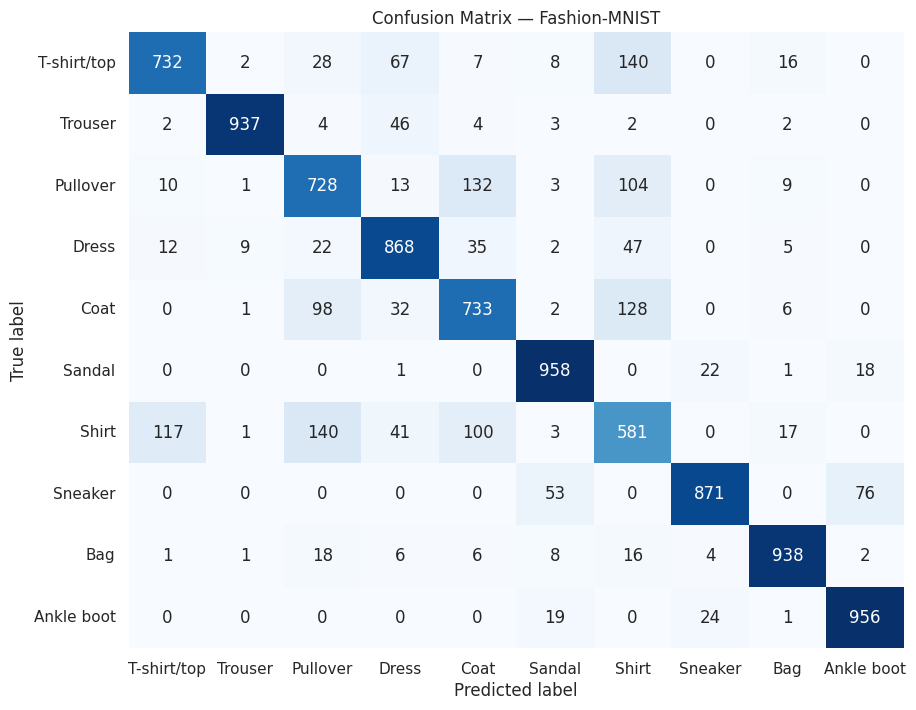

In [7]:

# 7. CONFUSION MATRIX
# Get predicted labels
y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix — Fashion-MNIST")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
